In [1]:
#import  libraries
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
df1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [4]:
df2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [5]:
df3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [6]:
df4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [7]:
df5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [8]:
# merging all the datasets
all_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [9]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
all_df.shape

(928436, 11)

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928436 entries, 0 to 928435
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928436 non-null  object 
 1   town                 928436 non-null  object 
 2   flat_type            928436 non-null  object 
 3   block                928436 non-null  object 
 4   street_name          928436 non-null  object 
 5   storey_range         928436 non-null  object 
 6   floor_area_sqm       928436 non-null  float64
 7   flat_model           928436 non-null  object 
 8   lease_commence_date  928436 non-null  int64  
 9   resale_price         928436 non-null  float64
 10  remaining_lease      219386 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.9+ MB


In [11]:
all_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [12]:
# Splitting the 'month' column into 'reg_year' and 'reg_month'
all_df[['reg_year', 'reg_month']] = all_df['month'].str.split('-', expand=True).astype(int)

In [13]:
#drop unwanted columns in df
all_df.drop(columns=['month'], inplace=True)

In [14]:
# Extract numeric part and convert to integer
all_df['block'] = all_df['block'].str.extract('(\d+)').astype(int)

In [15]:
#replacing MULTI-GENERATION with MULTI GENERATION
all_df['flat_type'] = all_df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
all_df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


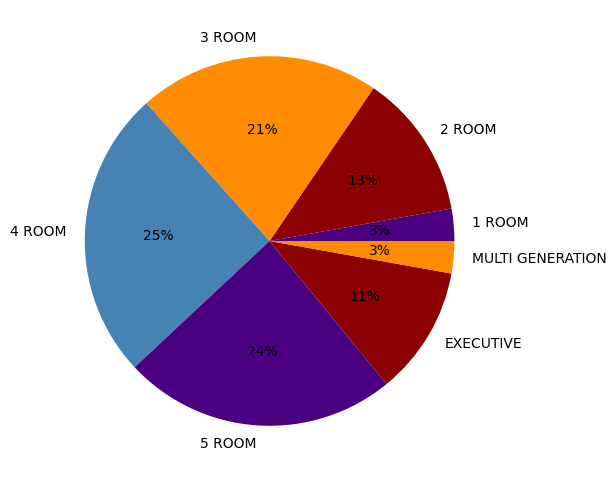

In [16]:
#Checking flat type with flat model in pie chart
temp = pd.DataFrame(all_df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
colors = ['#4b0082', '#8b0000', '#ff8c00', '#4682b4']
plt.figure(figsize=(8, 6))
plt.pie(temp['flat_model'], labels=temp['flat_type'], autopct='%.0f%%', colors=colors)
plt.show()

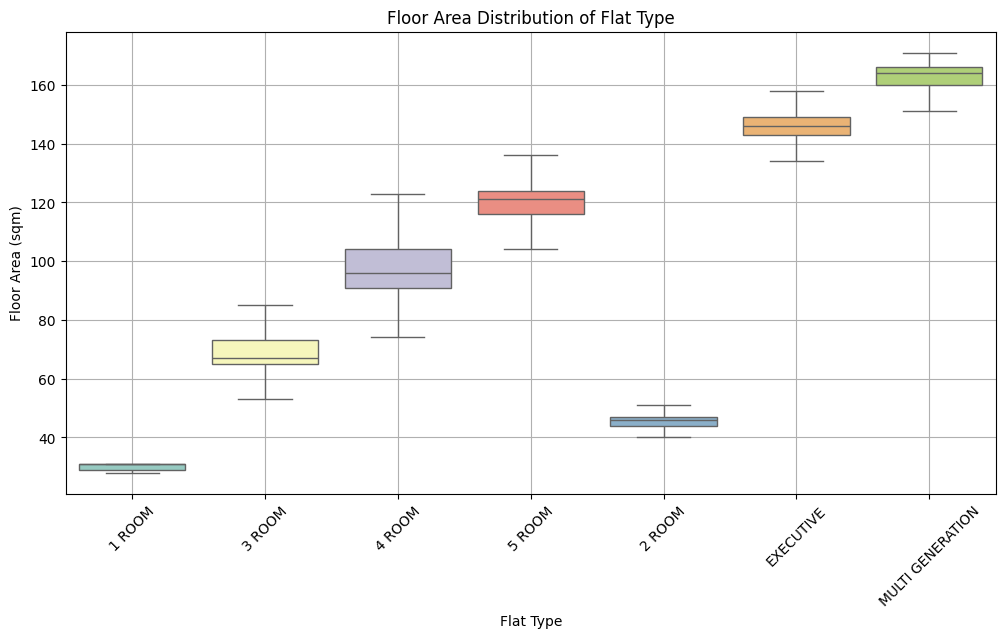

In [17]:
# Floor Area Distribution of Flat Type
plt.figure(figsize=(12, 6))
plt.title('Floor Area Distribution of Flat Type')
sns.boxplot(x='flat_type', y='floor_area_sqm', data=all_df, showfliers=False, palette='Set3')
plt.xlabel('Flat Type')
plt.ylabel('Floor Area (sqm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

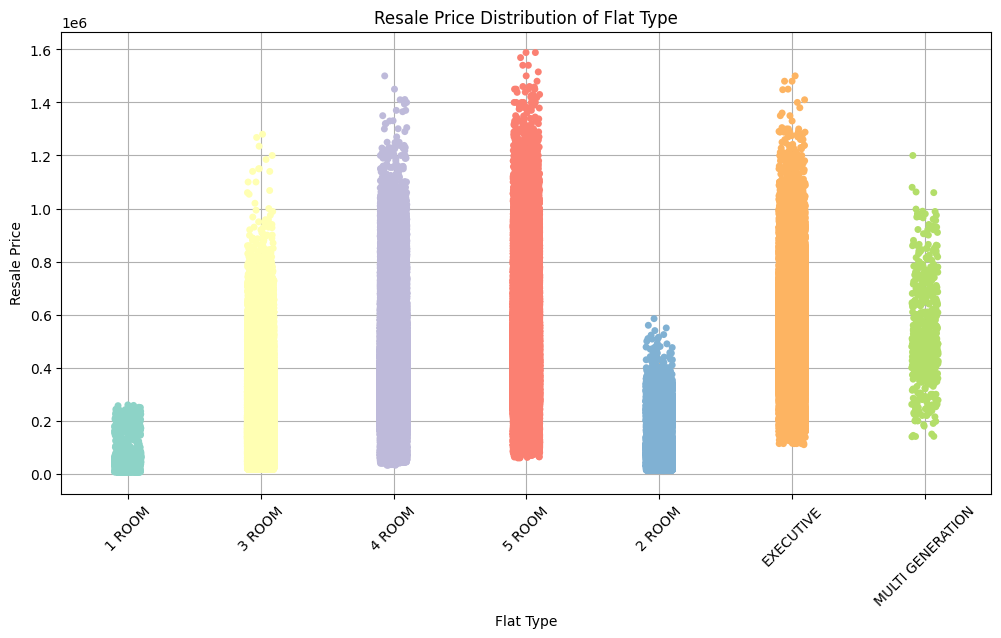

In [18]:
# Resale Price Distribution of Flat Type
plt.figure(figsize=(12, 6))
plt.title('Resale Price Distribution of Flat Type')
sns.stripplot(x='flat_type', y='resale_price', data=all_df, palette='Set3', jitter=True)
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

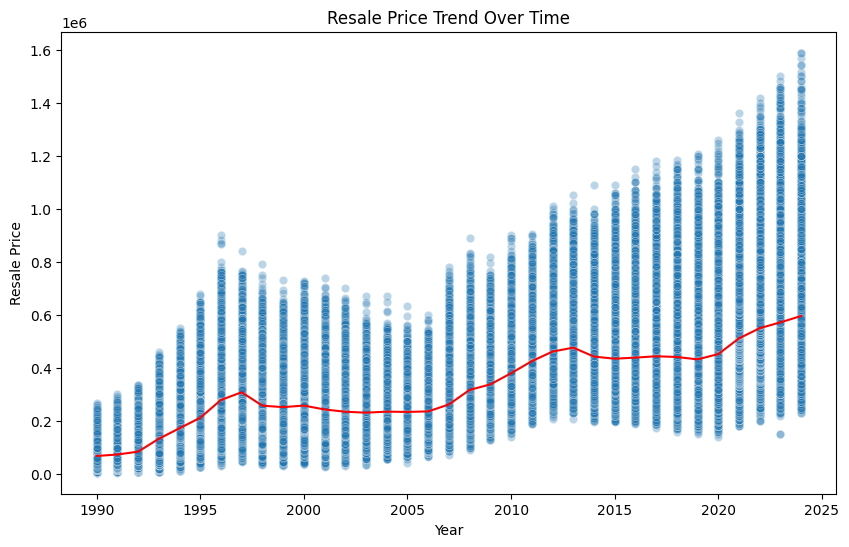

In [19]:
# Resale Price Trend Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reg_year', y='resale_price', data=all_df, alpha=0.3)
sns.lineplot(x='reg_year', y='resale_price', data=all_df, estimator='mean', ci=None, color='red')
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
import pickle
# Create LabelEncoders
street_name_encoder = LabelEncoder()
flat_type_encoder = LabelEncoder()
flat_model_encoder = LabelEncoder()
town_encoder = LabelEncoder()
storey_range_encoder = LabelEncoder()

# Fit and transform the columns
all_df['street_name'] = street_name_encoder.fit_transform(all_df['street_name'])
all_df['flat_type'] = flat_type_encoder.fit_transform(all_df['flat_type'])
all_df['flat_model'] = flat_model_encoder.fit_transform(all_df['flat_model'])
all_df['town'] = town_encoder.fit_transform(all_df['town'])
all_df['storey_range'] = storey_range_encoder.fit_transform(all_df['storey_range'])

# Save the encoders for future use
with open('street_name_encoder.pkl', 'wb') as f:
    pickle.dump(street_name_encoder, f)
with open('flat_type_encoder.pkl', 'wb') as f:
    pickle.dump(flat_type_encoder, f)
with open('flat_model_encoder.pkl', 'wb') as f:
    pickle.dump(flat_model_encoder, f)
with open('town_encoder.pkl', 'wb') as f:
    pickle.dump(town_encoder, f)
with open('storey_range_encoder.pkl', 'wb') as f:
    pickle.dump(storey_range_encoder, f)

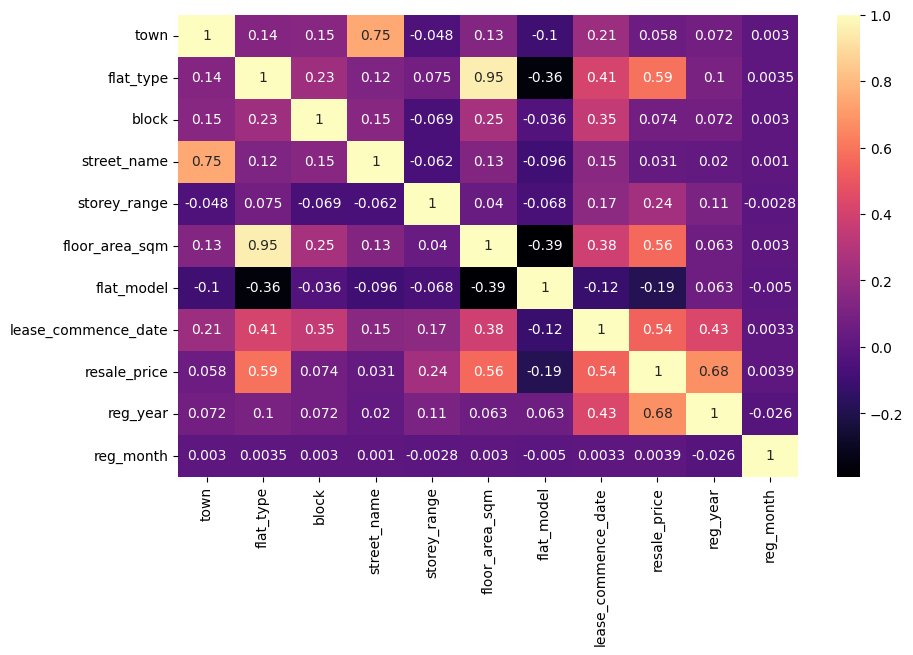

In [21]:
#Correlation
feature_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price','reg_year', 'reg_month']
plt.figure(figsize = (10,6))
sns.heatmap(all_df[feature_cols].corr(), cmap="magma",annot = True)
plt.show()

### Model and Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor

In [23]:
x = all_df[['town','flat_type','block','street_name','storey_range','storey_range','flat_model','lease_commence_date','reg_year','reg_month']]
y = all_df['resale_price']

In [24]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# Linear Regression

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 61471.516913629195
MSE = 6795411547.44905
RMSE  = 82434.28623727539
R2 Score = 0.7658140513691754


In [26]:
#Decision Tree Regression
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 20293.21726377511
MAE is - 922449020.389093
RMSE is - 30371.84585087138
R2 Score is - 0.9682102257685204


In [27]:
#Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 33145.59410775666
MAE is - 2345285860.776523
RMSE is - 48428.15153169201
Accuracy Score is - 0.9191759041698382


In [28]:
# Polynomial Regression
degree = 2 
poly = PolynomialFeatures(degree=degree)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_regressor = LinearRegression()
poly_regressor.fit(x_poly_train, y_train)
y_pred = poly_regressor.predict(x_poly_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE is - {mae}')
print(f'MSE is - {mse}')
print(f'RMSE is - {rmse}')
print(f'R2 Score is - {r2}')


MAE is - 56804.329706477256
MSE is - 5698787804.009359
RMSE is - 75490.31596177988
R2 Score is - 0.8036062983663298


In [30]:
# Robust regression
robust_regressor = HuberRegressor()
robust_regressor.fit(x_train, y_train)

# Predict using the model
y_pred = robust_regressor.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE is - {mae}')
print(f'MSE is - {mse}')
print(f'RMSE is - {rmse}')
print(f'R2 Score is - {r2}')

MAE is - 89502.60702127648
MSE is - 16472437667.25198
RMSE is - 128344.9947105534
R2 Score is - 0.4323208514404615


### saving the model

In [29]:
with open ('dt.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)